# Crop Recommendation

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np

In [2]:
#Load dataset

crop_data = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\AI 2024\\Semester 1\\Capstone (AIDI 1003)\\Final Project\\Crop Recommendation\\Crop_recommendation_data.csv")

In [3]:
#look the dataset

crop_data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [4]:
#get the shape of the dataset (numbers of columns and rows)
crop_data.shape

(2200, 8)

In [5]:
#summary of the dataset (column name and data types)
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
#checking for the null values
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
#cheking duplicates values
crop_data.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool>

In [8]:
#discribe the dataset (mean, standard deviation, quantile information,min, max)
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
#get the correlation between all the columns with the numerical datatype (int, float)
crop_data.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4328\2167845539.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crop_data.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4328\1943638963.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crop_data.corr(), annot=True, cbar=True)


<AxesSubplot: >

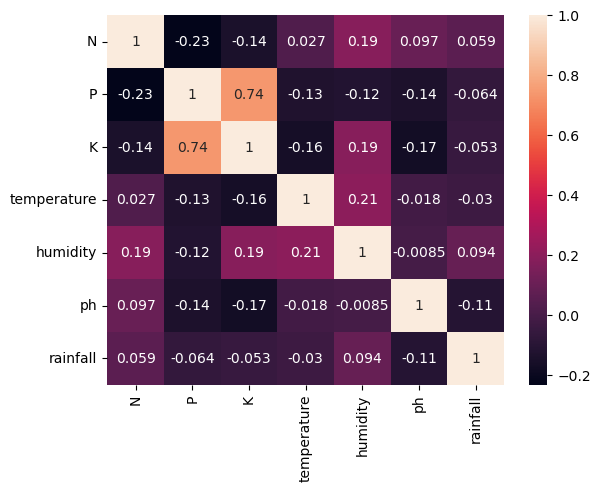

In [10]:
#visualization of the correlation (heatmap)

import seaborn as sns
sns.heatmap(crop_data.corr(), annot=True, cbar=True)

In [11]:
#count for each lables
crop_data.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [12]:
#How many number of labels
crop_data['label'].unique().size

22

In [13]:
#print the name of all the columns
crop_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

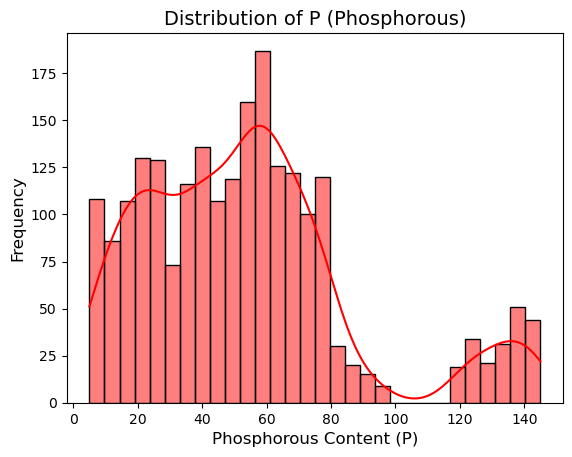

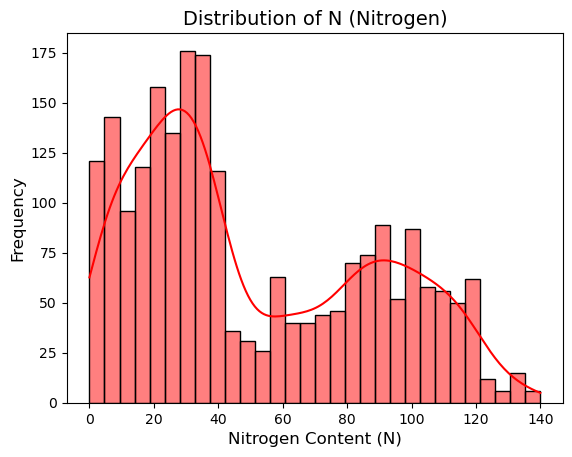

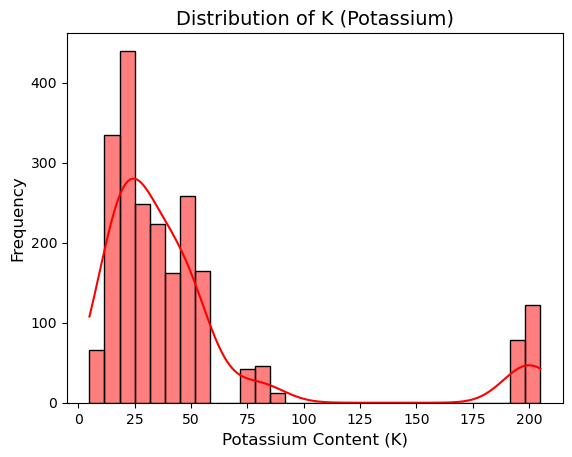

In [14]:
# check how the data is distributed

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(crop_data['P'], bins=30, color='red', kde=True, edgecolor='black')
plt.title('Distribution of P (Phosphorous)', fontsize=14)
plt.xlabel('Phosphorous Content (P)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

sns.histplot(crop_data['N'], bins=30, color='red', kde=True, edgecolor='black')
plt.title('Distribution of N (Nitrogen)', fontsize=14)
plt.xlabel('Nitrogen Content (N)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

sns.histplot(crop_data['K'], bins=30, color='red', kde=True, edgecolor='black')
plt.title('Distribution of K (Potassium)', fontsize=14)
plt.xlabel('Potassium Content (K)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

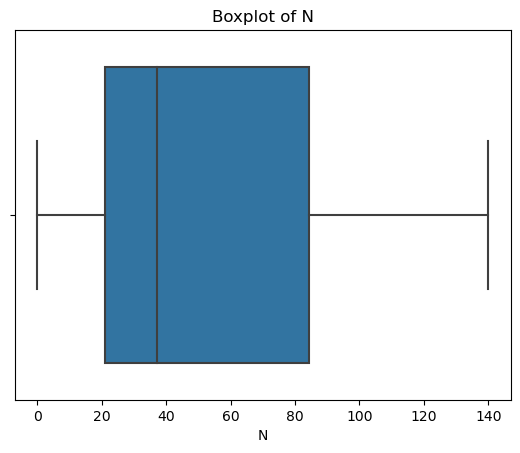

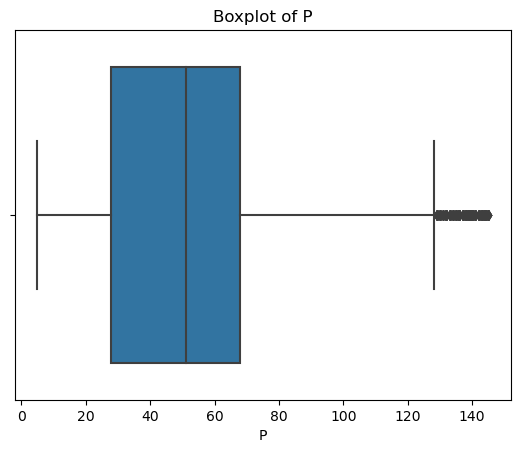

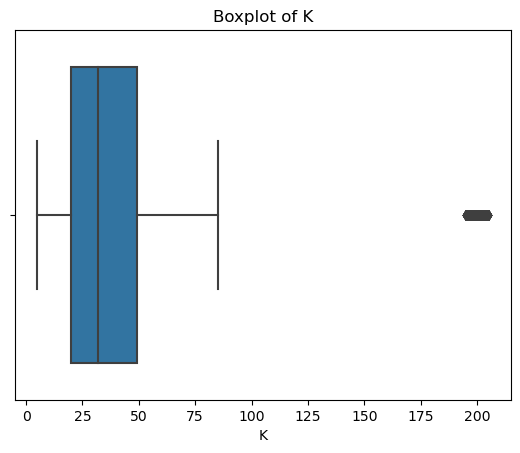

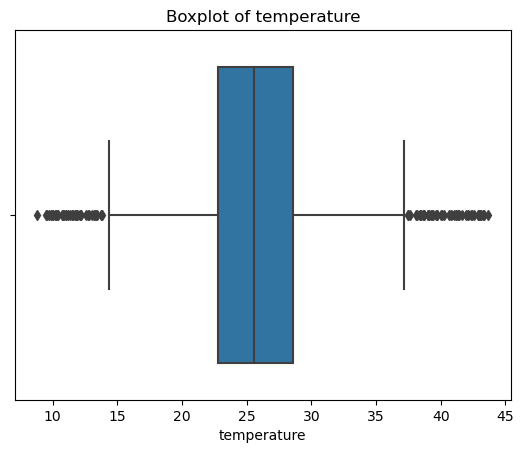

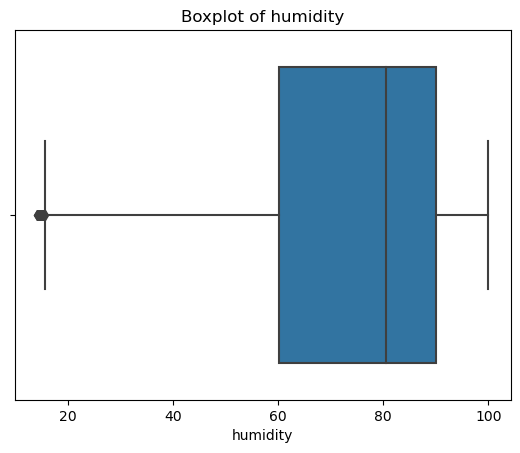

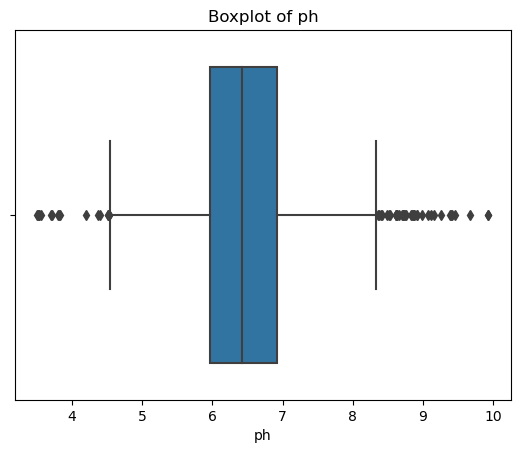

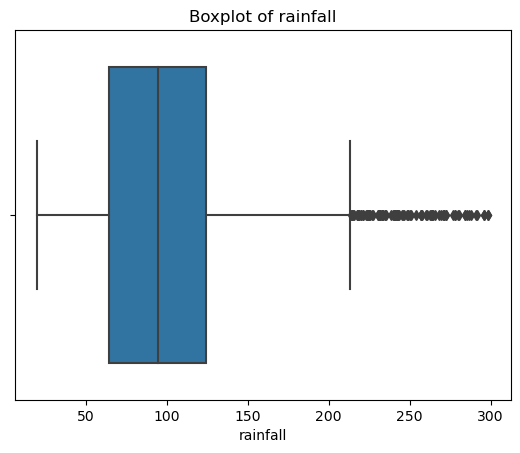

In [15]:
# Boxplot for 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall' features
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    sns.boxplot(x=crop_data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [16]:


crop_dict = {
    
    'rice': 1,
    'maize': 2,
    'chickpea': 3,
    'kidneybeans': 4,
    'pigeonpeas': 5,
    'mothbeans': 6,
    'mungbean': 7,
    'blackgram': 8,
    'lentil': 9, 
    'pomegranate': 10,
    'banana': 11, 
    'mango': 12, 
    'grapes': 13, 
    'watermelon': 14, 
    'muskmelon': 15, 
    'apple': 16,
    'orange': 17, 
    'papaya': 18, 
    'coconut': 19, 
    'cotton': 20, 
    'jute': 21, 
    'coffee': 22
        
    
}

crop_data['label'] = crop_data['label'].map(crop_dict)



In [17]:
crop_data.head(20)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
5,69,37,42,23.058049,83.370118,7.073454,251.055000,1
6,69,55,38,22.708838,82.639414,5.700806,271.324860,1
7,94,53,40,20.277744,82.894086,5.718627,241.974195,1
8,89,54,38,24.515881,83.535216,6.685346,230.446236,1
9,68,58,38,23.223974,83.033227,6.336254,221.209196,1


In [18]:
#assign the dependent and independent variables

#independent variables

X = crop_data.drop('label', axis = 1)

#dependent variable

Y = crop_data['label']

In [19]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [20]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [21]:
#convert the categorical data into numerical using encoding (label encoding)

#from sklearn.preprocessing import LabelEncoder

#Y = Y.astype(str)

#label_encoder = LabelEncoder()
#y_encoded = label_encoder.fit_transform(crop_data['label'])

In [22]:
#print encoded data
#y_encoded

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [24]:
X_train.shape

(1760, 7)

In [25]:
#Normalization (minmax scaler)

from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [26]:
#Standardization (Standard Scaler)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [27]:
#import all the models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score


In [28]:
# Initialzing empty lists to append all model's name and corresponding name
accuracy = []
algo_names = []

In [29]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [30]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    accuracy.append(score)
    algo_names.append(name)
    print(f"{name} model with accuracy: {score:.2f}")

LogisticRegression model with accuracy: 0.96
GaussianNB model with accuracy: 1.00
SVC model with accuracy: 0.97
KNeighborsClassifier model with accuracy: 0.97
DecisionTreeClassifier model with accuracy: 0.99
ExtraTreeClassifier model with accuracy: 0.91
RandomForestClassifier model with accuracy: 0.99
BaggingClassifier model with accuracy: 0.98
GradientBoostingClassifier model with accuracy: 0.98


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier model with accuracy: 0.10


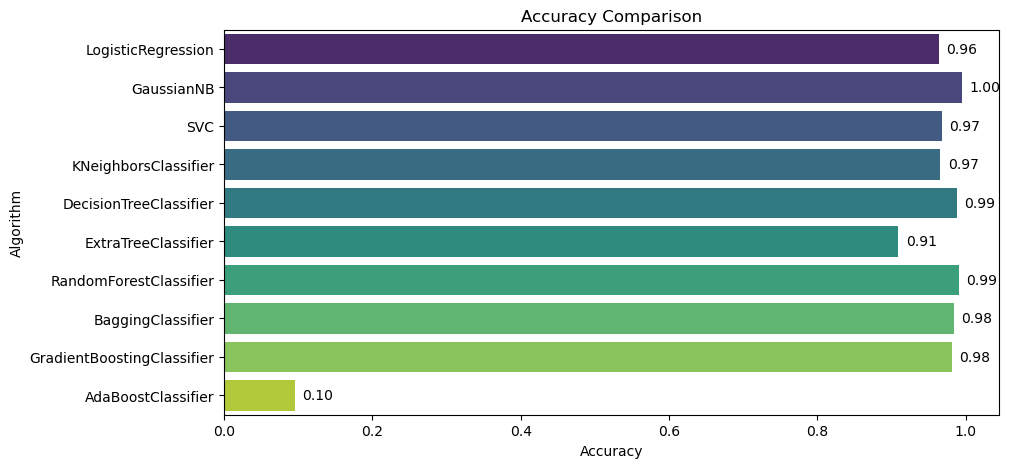

In [31]:
#Accuracy comparison

plt.figure(figsize=(10,5),dpi = 100)
ax = sns.barplot(x = accuracy,y = algo_names,palette='viridis')
for i, v in enumerate(accuracy):
    ax.text(v + 0.01, i, f"{v:.2f}", color='black', va='center', fontsize=10)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.show()



In [32]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9931818181818182

In [33]:
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [34]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randclf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [35]:
N=90
P= 42
K= 43
temperature= 20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [36]:
predict

array([18], dtype=int64)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = accuracy_score(y_test, y_pred)

#x = metrics.accuracy_score(y_test, predicted_values)
print("RF's Accuracy is: ", x)

print(classification_report(y_test, y_pred))

RF's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        23
           6       1.00      0.96      0.98        24
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        20
           9       0.92      1.00      0.96        11
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        23
          17       1.00      1.00      1.00

In [38]:
# Cross validation score (Random Forest)
from sklearn.model_selection import cross_val_score
score = cross_val_score(RF,X,Y,cv=5)
score

array([0.99772727, 0.99318182, 0.99772727, 0.99772727, 0.98863636])

In [39]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = RF.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [40]:
N=90
P= 42
K= 43
temperature= 20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [41]:
predict


array([18], dtype=int64)

In [43]:
Y[17]

1

In [44]:
import pickle
pickle.dump(randclf, open('model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))